<a href="https://www.kaggle.com/code/tusharaggarwal27/titanic-project-tusharaggarwal27?scriptVersionId=112338778" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic Project:©github.com/tushar2704,©kaggle.com/tusharaggarwal27, ©linkedin.com/in/tusharaggarwalinseec
In this notebook The goal is to correctly predict if someone survived the Titanic shipwreck.


**Best results :  % accuracy ()**

**Overview
1) Understand the shape of the data (Histograms, box plots, etc.)

2) Data Cleaning

3) Data Exploration

4) Feature Engineering

5) Data Preprocessing for Model

6) Basic Model Building

7) Model Tuning

8) Ensemble Modle Building

9) Results**


In [2]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#importing the required liabraries
#Note additional required liabraries are import in code block as and when needed 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#Importing the required data

train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#Checking the read data

print(train_data.head()), print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

(None, None)

In [5]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
print(train_data.shape),print(test_data.shape) 

(891, 12)
(418, 11)


(None, None)

In [6]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
print(train_data.columns), print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


(None, None)

# Project Planning #github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec


### Steps used for this project
#### Understand nature of the data .info() .describe()
#### Histograms and boxplots 
#### Value counts 
#### Missing data 
#### Correlation between the metrics 
#### Explore interesting themes 
#### Wealthy survive? 
#### By location 
#### Age scatterplot with ticket price 
#### Young and wealthy Variable? 
#### Total spent? 
#### Feature engineering 
#### preprocess data together or use a transformer? 
#### use label for train and test   
#### Scaling?
#### Model Baseline 
#### Model comparison with CV 

In [7]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#Understand nature of the data .info() .describe()

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Notes : Column-'Age','Cabin' &'Embarked' has missing values
### Total 891 rows of data with 12 features
### 

In [8]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Light Data Exploration
1) For numeric data,
Made histograms to understand distributions,
Corrplot,
Pivot table comparing survival rate across numeric variables

2) For Categorical Data,
Made bar charts to understand balance of classes,
Made pivot tables to understand relationship with survival

In [9]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#Separating numeric columns
numeric = train_data.describe().columns
numeric

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#numeric and categorical values separately 

train_data_num = train_data[['Age','SibSp','Parch','Fare']]
train_data_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

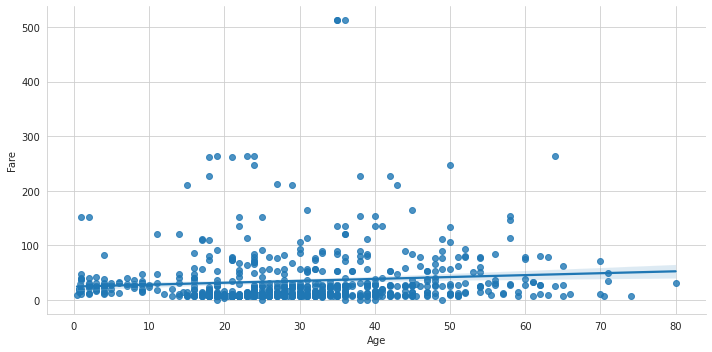

In [11]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#distributions(histograms) for all numeric variables 

sns.set_style("whitegrid")
distributions = sns.lmplot(x='Age', y='Fare', data=train_data_num, aspect=2)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


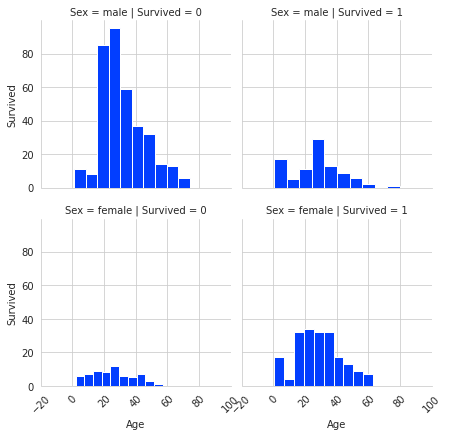

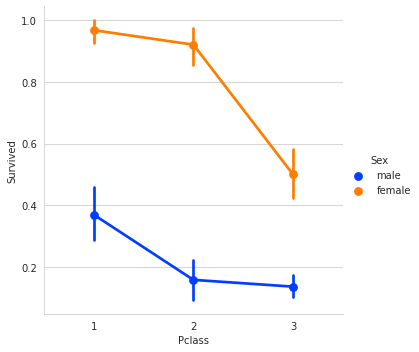

In [12]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#f, ax =plt.subplots(figsize=(5,7))
sns.set_palette("bright")
g = sns.FacetGrid(train_data, 
                 col="Survived",
                 row="Sex")
g = g.map(plt.hist,"Age")
sns.factorplot(x="Pclass",
              y="Survived",
              hue='Sex',
              data=train_data)
g.despine(left=True)
g.set_ylabels("Survived")
g.set_xticklabels(rotation=45)



            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

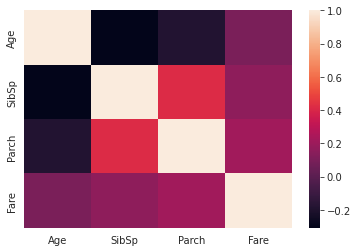

In [13]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#non-normal distributions

print(train_data_num.corr())
sns.heatmap(train_data_num.corr())

In [14]:
#Note: Survived has negative (0.33) correlation with Pclass

In [15]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
#Comparing survival rate across Age, SibSp, Parch, and Fare from Training data
pd.pivot_table(train_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


<AxesSubplot:xlabel='Sex', ylabel='count'>

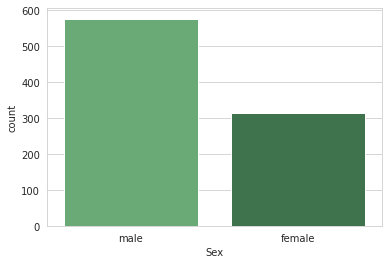

In [16]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
#Category columns countplots

sns.countplot(x="Sex",
             data=train_data_cat,
             palette="Greens_d")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

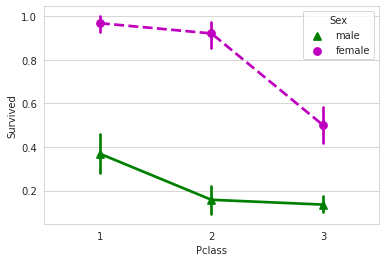

In [17]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
#pointplot
sns.pointplot(x="Pclass",
             y="Survived",
             hue="Sex",
             data=train_data_cat,
             palette={"male":"g", "female":"m"}, markers=["^", "o"], linestyles=["-","--"])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

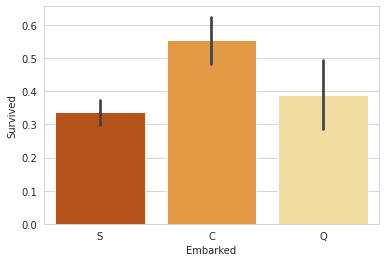

In [18]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
sns.barplot(x="Embarked", y="Survived", data=train_data, palette="YlOrBr_r")

In [19]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


**Feature Engineering- Most important for competitions**
1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

2) Tickets - Do different ticket types impact survival rates?

3) Does a person's title relate to survival rates?

In [20]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
#feature engineering on person's title 
train_data.Name.head(50)
train_data['name_title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#mr., ms., master. etc
train_data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [21]:
#Note: Note much variation with Name column, no significance

**Data Preprocessing for Model**
1) Drop null values from Embarked (only 2)

2) Include only relevant variables (Since we have limited data,  exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)
Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use one hot encoder).

4) Impute data with mean for fare and age (experiment with median)

5) Normalized fare using logarithm to give more semblance of a normal distribution

6) Scaled data 0-1 with standard scaler

In [22]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
train_data.Cabin.isna().sum()

687

In [23]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
#since there are '687' NaN's dropping the Cabin column from train_data_cat, also since ticket number are random and doesnot provide any value dropping those too
train_data.drop(['Cabin','Ticket'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


<AxesSubplot:>

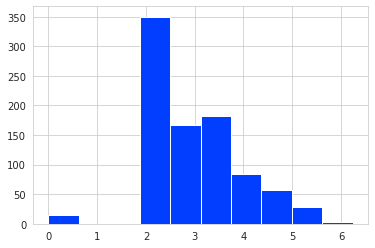

In [24]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
#impute nulls for continuous data 

#train_data.Age = train_data.Age.fillna(train_data.Age.mean())
train_data.Age = train_data.Age.fillna(train_data.Age.median())
#train_data.Fare = train_data.Fare.fillna(train_data.Fare.mean())
train_data.Fare = train_data.Fare.fillna(train_data.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
train_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
#train_data['norm_sibsp'] = np.log(train_data.SibSp+1)
#train_data['norm_sibsp'].hist()

# log norm of fare (used)
train_data['norm_fare'] = np.log(train_data.Fare+1)
train_data['norm_fare'].hist()

In [25]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
# converted Pclass to category for pd.get_dummies()
train_data.Pclass = train_data.Pclass.astype(str)

In [26]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,norm_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,3.433987


In [27]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
#created dummy variables from categories (also can use OneHotEncoder)

all_dummies = pd.get_dummies(train_data[['Pclass','Sex','SibSp','Parch','Age','norm_fare']])
all_dummies

,SibSp,Parch,Age,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,2.110213,0,0,1,0,1
1,1,0,38.0,4.280593,1,0,0,1,0
2,0,0,26.0,2.188856,0,0,1,1,0
3,1,0,35.0,3.990834,1,0,0,1,0
4,0,0,35.0,2.202765,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,2.639057,0,1,0,0,1
887,0,0,19.0,3.433987,1,0,0,1,0
888,1,2,28.0,3.196630,0,0,1,1,0
889,0,0,26.0,3.433987,1,0,0,0,1


In [28]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec


#Split to train test again
X_train = all_dummies
X_test = test_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
X_test.dropna(inplace=True)

In [29]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
X_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec
#Declaring target variable(y)
y_train = train_data.Survived
y_train.shape

(889,)

In [31]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec

# Scaling the data

from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #creating instance
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(
                                   all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
X_test_scaled = scale.fit_transform(X_test.drop(["Sex",'Embarked'], axis=1))

all_dummies_scaled #showing scaled values between 0 & 1

,SibSp,Parch,Age,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.431350,-0.474326,-0.563674,-0.877591,0,0,1,0,1
1,0.431350,-0.474326,0.669217,1.366380,1,0,0,1,0
2,-0.475199,-0.474326,-0.255451,-0.796281,0,0,1,1,0
3,0.431350,-0.474326,0.438050,1.066796,1,0,0,1,0
4,-0.475199,-0.474326,0.438050,-0.781901,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,-0.475199,-0.474326,-0.178396,-0.330815,0,1,0,0,1
887,-0.475199,-0.474326,-0.794841,0.491068,1,0,0,1,0
888,0.431350,2.006119,-0.101340,0.245663,0,0,1,1,0
889,-0.475199,-0.474326,-0.255451,0.491068,1,0,0,0,1


In [32]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec

X_train_scaled = all_dummies_scaled
X_test_scaled = X_test_scaled

y_train = train_data.Survived

#github.com/tushar2704,kaggle.com/tusharaggarwal27,linkedin.com/in/tusharaggarwalinseec

**Model Building (Baseline Validation Performance)**
Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

Naive Bayes (72.6%)
Logistic Regression (82.1%)
Decision Tree (77.6%)
K Nearest Neighbor (80.5%)
Random Forest (80.6%)
Support Vector Classifier (83.2%)
Xtreme Gradient Boosting (81.8%)
Soft Voting Classifier - All Models (82.8%)

Trying model with lazypredict